In [4]:
import json
import matplotlib.pyplot as plt
with open('modelF1.json', 'r') as f:
    data = json.load(f)


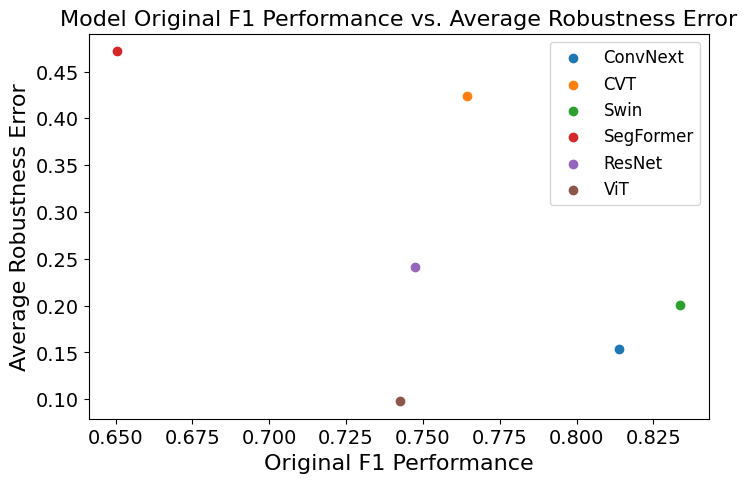

In [11]:
# Function to calculate the robustness error for each model
def calculate_robustness_error(model_data):
    original = model_data['Original']
    attacks = [value for key, value in model_data.items() if key != 'Original']
    mean_attack = sum(attacks) / len(attacks)
    return original - mean_attack

# Preparing the data for plotting
models = []
original_performance = []
robustness_errors = []

# Calculate the robustness error for each model
for model, model_data in data.items():
    models.append(model)
    original_performance.append(model_data['Original'])
    robustness_errors.append(calculate_robustness_error(model_data))

plt.rcParams.update({'font.size': 14})

# Create a new figure with a smaller size
plt.figure(figsize=(8, 5))

# Plot the data without grid lines
for i, model in enumerate(models):
    plt.scatter(original_performance[i], robustness_errors[i], label=model)

# Set the title and labels with larger font size
plt.title('Model Original F1 Performance vs. Average Robustness Error', fontsize=16)
plt.xlabel('Original F1 Performance', fontsize=16)
plt.ylabel('Average Robustness Error', fontsize=16)

# Increase the legend font size
plt.legend(fontsize=12)

# Display the plot without grid lines
plt.show()


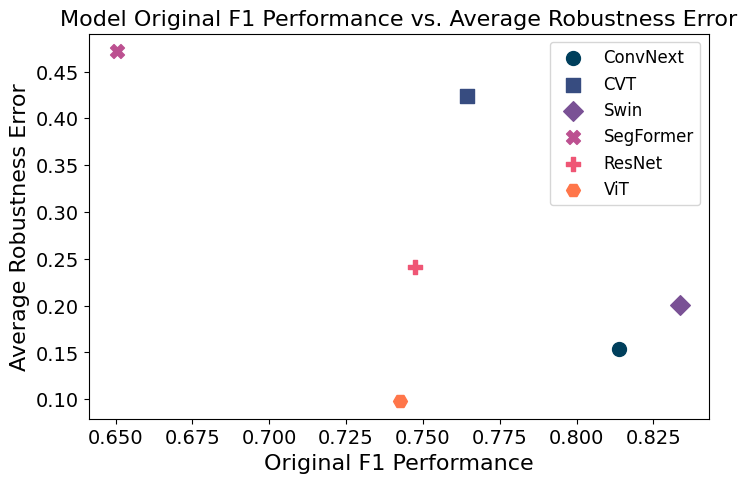

In [13]:
plt.rcParams.update({'font.size': 14, 'axes.titlesize': 16, 'axes.labelsize': 16})

# Define a set of unique dark colors, ensuring they are not similar
distinct_dark_colors = ['#003f5c', '#374c80', '#7a5195', '#bc5090', '#ef5675', '#ff764a']

# Define a set of unique markers for each model
unique_markers = ['o', 's', 'D', 'X', 'P', 'H']

# Create a new figure with a smaller size
plt.figure(figsize=(8, 5))

# Plot the data with different markers and distinct dark colors
for i, model in enumerate(models):
    plt.scatter(original_performance[i], robustness_errors[i], label=model, 
                marker=unique_markers[i], color=distinct_dark_colors[i], s=100)

# Set the title and labels
plt.title('Model Original F1 Performance vs. Average Robustness Error')
plt.xlabel('Original F1 Performance')
plt.ylabel('Average Robustness Error')

# Increase the legend font size and adjust its location
plt.legend(fontsize=12, loc='best')

# Remove grid lines
plt.grid(False)

# Display the plot
plt.show()